In [1]:
import tensorflow as tf

# Loading mnist dataset
It has 60,000 training samples and 10,000 test samples
Tensorflow already contain this dataset which can be loaded or imported using Keras

In [2]:
mnist = tf.keras.datasets.mnist

# split/unpack the dataset into training and testing data

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape#all images are 28*28 sized from number 0 to 9

(60000, 28, 28)

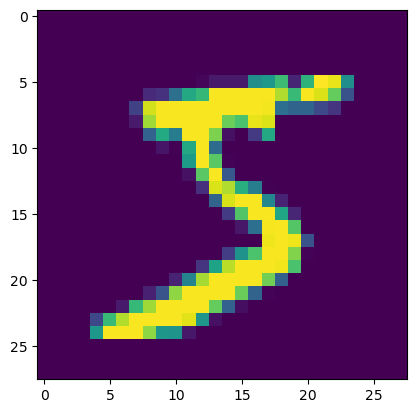

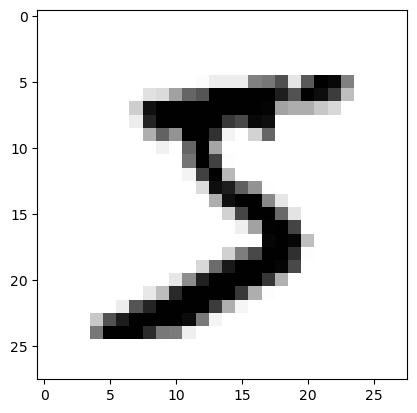

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)#to show it is in binary from

# checking the values of each image pixels before normalization
Black- near to 0    White-near to 255

In [6]:
print(x_train[0])# the output implies the background is black in colour and the digit 5 is white

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# normalizing the data/ pre processing step

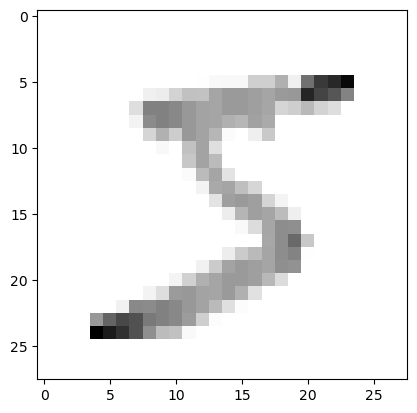

In [7]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [8]:
print(x_train[0])# the values are normalized- all values ranges from 0 to 1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0]) #to check the label of the data

5


# resizing image to make it suitable for convo;ution operation

In [10]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)#-1 corresponds to max value-60,000
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("training samples dimension",x_trainr.shape)
print("testing samples dimension",x_testr.shape)

training samples dimension (60000, 28, 28, 1)
testing samples dimension (10000, 28, 28, 1)


# creating deep laerning architecture

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [12]:
#creating a neural network
model=Sequential()

#first convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))#activation function
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling image

#second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#last fully connected layer 
model.add(Dense(10))# should have 10 layers 0-9 
model.add(Activation("softmax"))#softmax for classification/class probability

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [14]:
print("total training samples=",len(x_trainr))

total training samples= 60000


In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
#training the model data-x_trainr label-y_train,70% data is used for training and remaining 30% is used for self evaluation
#validation accuarcy < accuracy-> overfitting
model.fit(x_trainr,y_train,epochs=5,batch_size=1,validation_split=0.3)

Epoch 1/5
42000/42000 [==============================] - 197s 5ms/step - loss: 0.2241 - accuracy: 0.9321 - val_loss: 0.1055 - val_accuracy: 0.9695
Epoch 2/5
42000/42000 [==============================] - 194s 5ms/step - loss: 0.1180 - accuracy: 0.9683 - val_loss: 0.1090 - val_accuracy: 0.9698
Epoch 3/5
42000/42000 [==============================] - 195s 5ms/step - loss: 0.1033 - accuracy: 0.9741 - val_loss: 0.1421 - val_accuracy: 0.9704
Epoch 4/5
42000/42000 [==============================] - 195s 5ms/step - loss: 0.0914 - accuracy: 0.9760 - val_loss: 0.1147 - val_accuracy: 0.9733
Epoch 5/5
42000/42000 [==============================] - 196s 5ms/step - loss: 0.0951 - accuracy: 0.9775 - val_loss: 0.0936 - val_accuracy: 0.9768


In [17]:
#evaluating the testing dataset
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("test loss on 10,000 test samples",test_loss)
print("validation accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.1048 - accuracy: 0.9773
test loss on 10,000 test samples 0.10475435853004456
validation accuracy on 10,000 test samples 0.9772999882698059


In [18]:
predictions=model.predict([x_testr])

313/313 [==============================] - 3s 10ms/step


In [19]:
print(predictions) # these predictions are based on one hot encoding 

[[7.8509149e-24 2.0006882e-11 1.8636296e-08 ... 1.0000000e+00
  2.6123152e-20 1.5723497e-09]
 [1.4016695e-18 3.4550867e-18 1.0000000e+00 ... 4.8882981e-10
  2.3975304e-15 5.0090116e-26]
 [7.5847379e-23 1.0000000e+00 1.4753608e-19 ... 7.5587851e-27
  5.8381426e-21 0.0000000e+00]
 ...
 [1.4489618e-27 1.8252019e-18 2.3386046e-18 ... 4.3665992e-21
  2.4948613e-17 7.4908578e-15]
 [2.6574178e-17 3.0533456e-22 1.1750054e-25 ... 1.8780778e-23
  6.0442915e-11 5.4158311e-13]
 [3.9528436e-06 4.9496991e-12 1.0107572e-12 ... 8.2246762e-20
  1.9576543e-08 9.7877368e-14]]


In [20]:
#convert these predictions to numerical for better understanding
print(np.argmax(predictions[0]))

7


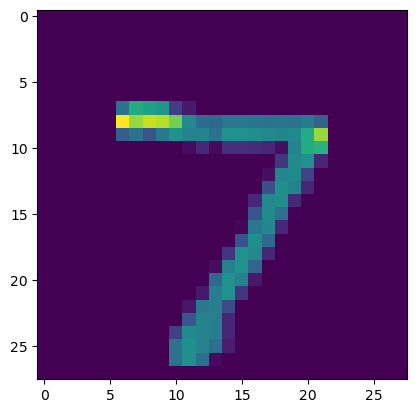

In [21]:
plt.imshow(x_test[0])#to check above answer is true or not

In [22]:
print(np.argmax(predictions[128]))

8


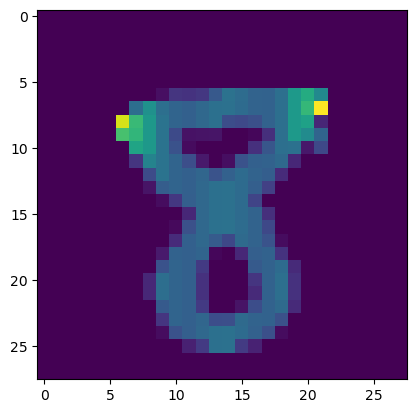

In [23]:
plt.imshow(x_test[128])

In [24]:
import cv2

In [51]:
img=cv2.imread("1.png")

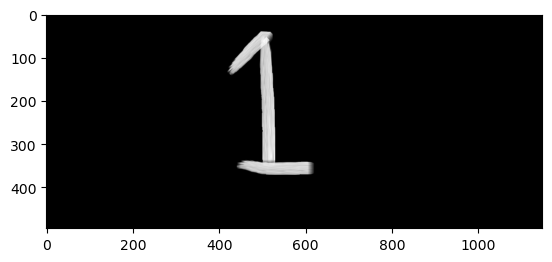

In [52]:
plt.imshow(img)

In [53]:
img.shape

(495, 1149, 3)

In [54]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [55]:
gray.shape


(495, 1149)

In [56]:
resized= cv2.resize(gray,(28,28),interpolation =cv2.INTER_AREA)

In [57]:
resized.shape

(28, 28)

In [58]:
newimg=tf.keras.utils.normalize(resized,axis=1)

In [59]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [60]:
newimg.shape

(1, 28, 28, 1)

In [61]:
prediction=model.predict(newimg)

1/1 [==============================] - 0s 26ms/step


In [62]:
print(np.argmax(prediction))

1


# video demo

In [68]:
import cv2
import numpy as np
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

cap=cv2.VideoCapture("1.mp4")#uploading video of digits
#cap=cv2.VideoCapture(1) for webcam
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")
    
text="some text in box"    
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]

text_offset_x=10
text_offset_y=img.shape[0]-25

box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))

cntr=0;

while True:
    ret,frame=cap.read()
    cntr=cntr+1;
    if((cntr%2)==0):
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        resized= cv2.resize(gray,(28,28),interpolation =cv2.INTER_AREA)
        newimg=tf.keras.utils.normalize(resized,axis=1)
        newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)
        predictions=model.predict(newimg)
        status=np.argmax(predictions)
        print(status)
        print(type(status))
        
        
        x1,y1,w1,h1=0,0,200,200
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,255,0),-1)
        cv2.putText(frame,status.astype(str),(x1+int(w1/5),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
    
    
    
        cv2.imshow("hand written digit recognition",frame)
    
        if cv2.waitKey(2) & 0xff == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 23ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 23ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 23ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 23ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 22ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 22ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 22ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 22ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 21ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 22ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 25ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 24ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 24ms/step
5
<class 'numpy.int64'>
